<a href="https://colab.research.google.com/github/ssupsandeep/PRODIGY_ML_01/blob/main/PRODIGY_ML_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Model Coefficients: [  300.71122682 10590.97192105  9417.09449966]
Intercept: -13530.732671776786
Mean Squared Error: 153817333.6322072
R^2 Score: 0.9983784576835049


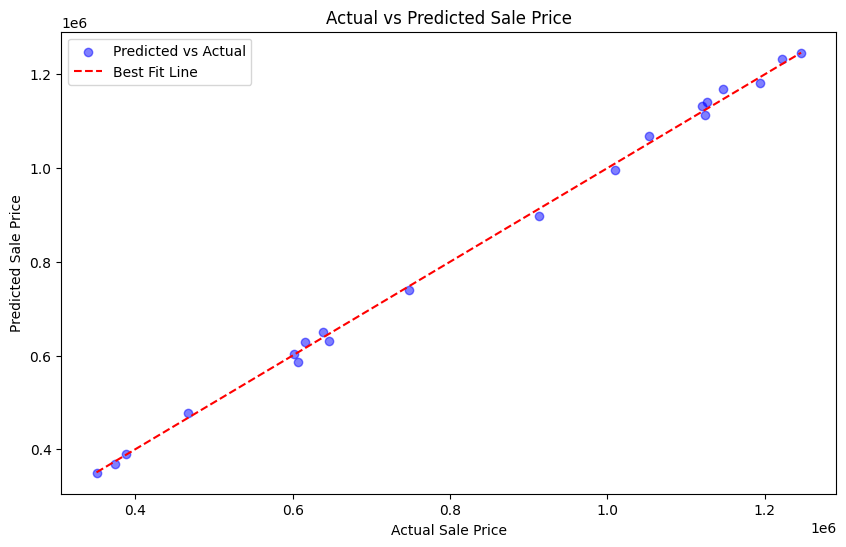

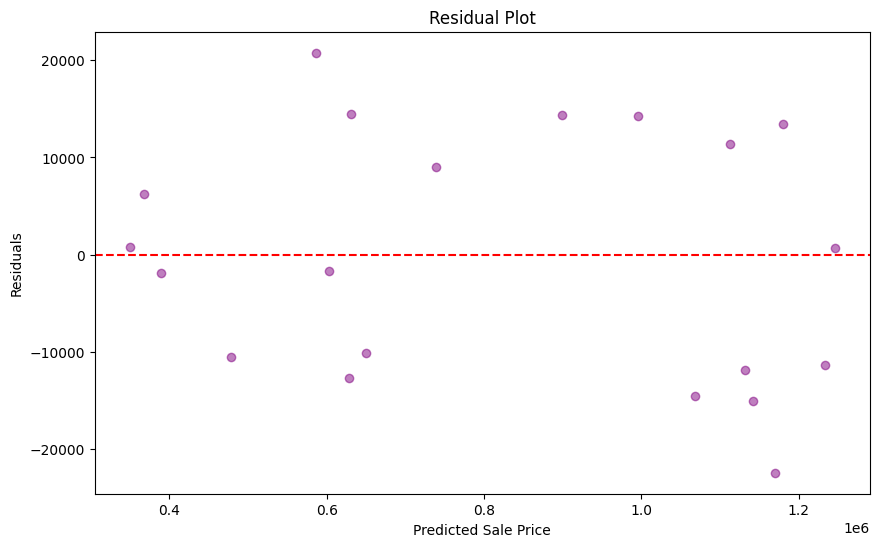

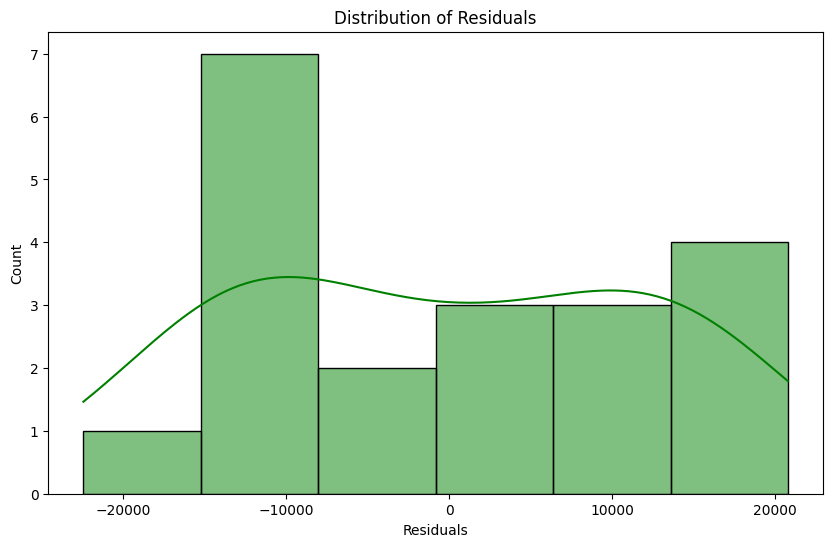

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate sample dataset
np.random.seed(42)
n = 100  # Number of samples
square_feet = np.random.randint(800, 4000, n)
bedrooms = np.random.randint(1, 6, n)
bathrooms = np.random.randint(1, 4, n)
price = (square_feet * 300) + (bedrooms * 10000) + (bathrooms * 5000) + np.random.randint(-20000, 20000, n)

# Create DataFrame
df = pd.DataFrame({'Square_Feet': square_feet, 'Bedrooms': bedrooms, 'Bathrooms': bathrooms, 'Price': price})

# Prepare data
X = df[['Square_Feet', 'Bedrooms', 'Bathrooms']]
y = df['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# === 1. Actual vs Predicted Sale Price with a Best-Fit Line ===
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Best Fit Line")
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Price")
plt.legend()
plt.show()

# === 2. Residual Plot ===
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='purple')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# === 3. Distribution of Residuals ===
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='green')
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()